# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.118747e+01     7.363295e+00
 * time: 0.0019459724426269531
     1     2.892165e+01     4.121660e+00
 * time: 0.007472038269042969
     2     1.976698e+01     3.671144e+00
 * time: 0.013534069061279297
     3     1.375817e+01     2.501157e+00
 * time: 0.02016592025756836
     4     1.365125e+01     3.880183e+00
 * time: 0.025762081146240234
     5     1.313769e+01     3.494311e+00
 * time: 0.0312349796295166
     6     1.077150e+01     2.829676e+00
 * time: 0.036607980728149414
     7     9.523384e+00     2.565059e+00
 * time: 0.04068803787231445
     8     8.876418e+00     8.854209e-01
 * time: 0.04473304748535156
     9     8.589863e+00     6.553506e-01
 * time: 0.04860401153564453
    10     8.499227e+00     1.038050e+00
 * time: 0.051258087158203125
    11     8.454903e+00     7.317076e-01
 * time: 0.053897857666015625
    12     8.430932e+00     6.902707e-01
 * time: 0.05736207962036133
    13     8.376409e+00     4.443434e-01
 

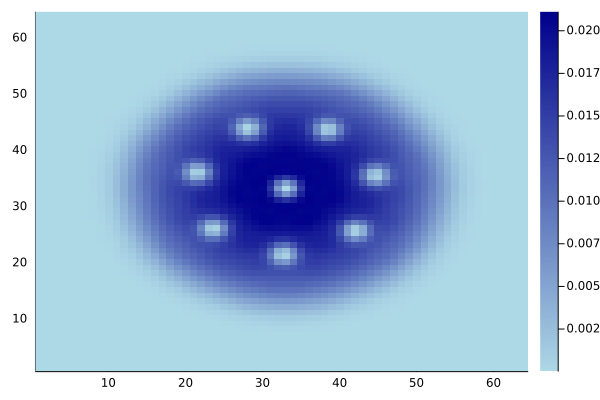

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)